In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, SCORERS
from sklearn import ensemble

# !pip install xgboost #uncomment of xgboost not installed
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from six import StringIO
from IPython.display import Image
# !pip install pydotplus #uncomment if pydotplus not installed
import pydotplus
import graphviz

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OTargetEncoderEstimator

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Loading the dataset into pandas dataframe

In [21]:
train_df = pd.read_pickle("..\Data\interim\\train.pkl")

In [22]:
test_df = pd.read_pickle("..\Data\interim\\test.pkl")

In [23]:
validate_df = pd.read_pickle("..\Data\interim\\validate.pkl")

In [24]:
production_df = pd.read_pickle("..\Data\interim\\data.pkl")

In [25]:
X_train = train_df.drop("satisfaction",axis=1).copy()

In [26]:
y_train = train_df["satisfaction"].copy()

In [27]:
X_test = test_df.drop("satisfaction",axis=1).copy()

In [28]:
y_test = test_df["satisfaction"].copy()

In [29]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
103044,Female,Loyal Customer,59,Business travel,Business,1470,4,4,4,4,...,4,4,4,4,4,5,4,3,7,0.0
43282,Female,disloyal Customer,22,Business travel,Eco,1771,1,1,1,4,...,5,4,3,4,3,1,4,4,0,0.0
65543,Male,Loyal Customer,55,Business travel,Business,3657,0,5,0,2,...,4,4,4,4,4,3,4,3,12,8.0
65083,Female,Loyal Customer,41,Business travel,Business,1796,0,4,0,1,...,5,3,3,3,3,5,3,3,0,0.0
76496,Male,Loyal Customer,42,Business travel,Eco,1709,2,3,3,3,...,2,2,4,4,4,1,3,2,0,0.0


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77928 entries, 103044 to 109671
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             77928 non-null  object 
 1   Customer Type                      77928 non-null  object 
 2   Age                                77928 non-null  int64  
 3   Type of Travel                     77928 non-null  object 
 4   Class                              77928 non-null  object 
 5   Flight Distance                    77928 non-null  int64  
 6   Seat comfort                       77928 non-null  int64  
 7   Departure/Arrival time convenient  77928 non-null  int64  
 8   Food and drink                     77928 non-null  int64  
 9   Gate location                      77928 non-null  int64  
 10  Inflight wifi service              77928 non-null  int64  
 11  Inflight entertainment             77928 non-nul

## Checking for class-imbalance

satisfied       42452
dissatisfied    35240
Name: satisfaction, dtype: int64


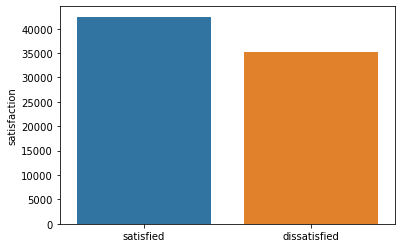

In [182]:
x=y_train.value_counts()
print(x)
sns.barplot(x.index,x)

satisfied       14184
dissatisfied    11713
Name: satisfaction, dtype: int64


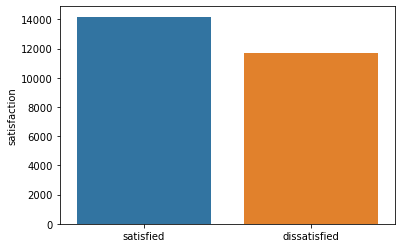

In [183]:
x=y_test.value_counts()
print(x)
sns.barplot(x.index,x)

## Categorical and numerical features

In [184]:
numerical_features = [x for x in X_train.select_dtypes(exclude = np.object)]
categorical_features = [x for x in X_train.select_dtypes(include = np.object)]

In [185]:
print("The numerical features of the dataset are ")
for p in numerical_features: print(p)

The numerical features of the dataset are 
Age
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes


In [186]:
print("The categorical features of the dataset are ")
for p in categorical_features: print(p)

The categorical features of the dataset are 
Gender
Customer Type
Type of Travel
Class


In [187]:
for f in categorical_features:
    print("\nThe unique labels in {} is {}\n".format(f, X_train[f].unique()))
    print("The values in {} is \n{}\n".format(f,  X_train[f].value_counts()))


The unique labels in Gender is ['Male' 'Female']

The values in Gender is 
Female    39404
Male      38288
Name: Gender, dtype: int64


The unique labels in Customer Type is ['Loyal Customer' 'disloyal Customer']

The values in Customer Type is 
Loyal Customer       63358
disloyal Customer    14334
Name: Customer Type, dtype: int64


The unique labels in Type of Travel is ['Business travel' 'Personal Travel']

The values in Type of Travel is 
Business travel    53671
Personal Travel    24021
Name: Type of Travel, dtype: int64


The unique labels in Class is ['Business' 'Eco' 'Eco Plus']

The values in Class is 
Business    37174
Eco         34916
Eco Plus     5602
Name: Class, dtype: int64



## Encode categorical variables

In [188]:
ohe_encoder = OneHotEncoder(cols=categorical_features, use_cat_names=True)
# tgt_encoder = Target

In [191]:
ohe_encoder.fit(X_train[categorical_features], y=)
encoded_cat_names = list(ohe_encoder.get_feature_names(categorical_features))
encoded_cat_names

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

## Creating pipeline

In [192]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [193]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('num', numeric_transformer, numerical_features),
        ('cat', ohe_encoder, categorical_features)
        ])

# Logistic Regression

In [194]:
# do correlation analysis

In [201]:
lg_reg_model= LogisticRegression(max_iter=10000, tol=0.1)

In [202]:
lg_reg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('lg_reg', lg_reg_model)])

In [205]:
lg_reg_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                       

## Prediction

In [206]:
y_pred = lg_reg_v1.predict(X_test)

In [207]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [208]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,dissatisfied,dissatisfied
4,satisfied,satisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,satisfied
9,satisfied,satisfied


In [215]:
#get significant variables?

## Confusion matrix

In [233]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["satisfied", "Not satisfied"] , 
               yticklabels = ["satisfied", "Not satisfied"],cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 0.5);
    plt.show()

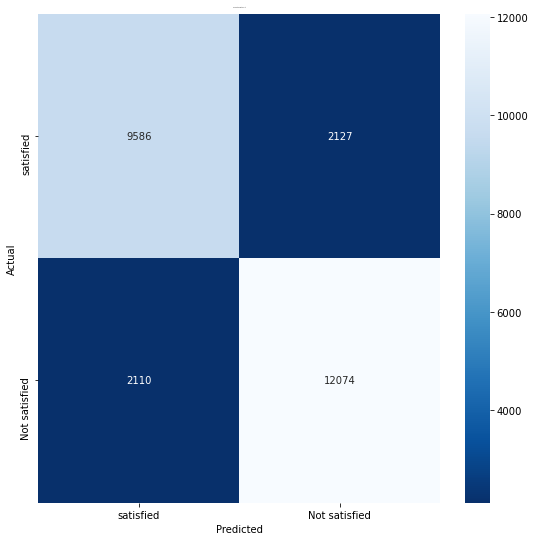

In [234]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [235]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [240]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
lg_reg_metrics_df = pd.DataFrame(measure_performance(cm))
lg_reg_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.82,0.85,0.82,0.82,0.84


Total Accuracy:  0.84


In [241]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [248]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


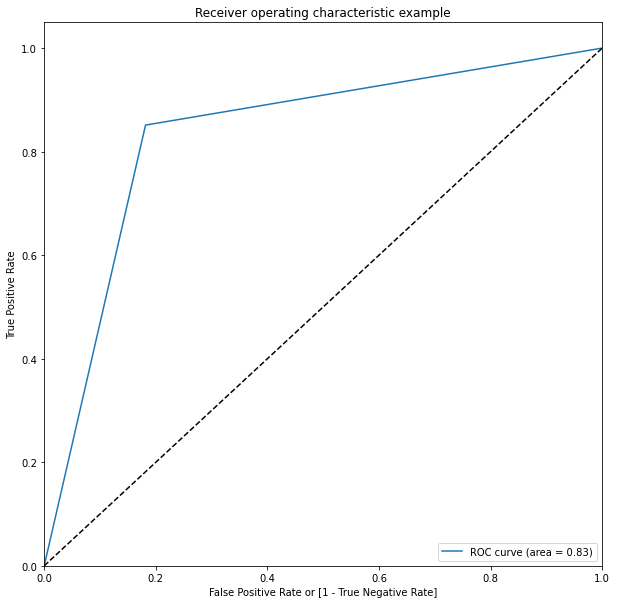

In [254]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [255]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.83

## k-fold cross validation

In [259]:
scores = cross_val_score( lg_reg_v1,
                          X_train,
                          y_train,
                          cv = 10,
                          scoring = 'roc_auc')

In [260]:
scores

array([0.9058809 , 0.91217888, 0.91173926, 0.91155549, 0.90410024,
       0.90580926, 0.91072043, 0.91497743, 0.91047229, 0.90138769])

In [261]:
scores.mean()

0.9088821873454952

In [262]:
scores.std()

0.004083162521295457

In [269]:
print("Increase in ROC-AUC after k-fold cross validation = ", scores.mean()/auc_score)

Increase in ROC-AUC after k-fold cross validation =  1.0887113123903815


# Decision tree

In [343]:
dt = tree.DecisionTreeClassifier(criterion = "entropy",
                                 max_depth=6, 
                                 min_samples_split=90, 
                                 min_samples_leaf=90, 
                                 class_weight = 'balanced')

dt_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('dt', dt)])

In [344]:
dt_v1.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                       

In [345]:
# tree visualize & variable importance?

## Prediction

In [346]:
y_pred = dt_v1.predict(X_test)

In [347]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [348]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,dissatisfied,dissatisfied
4,satisfied,dissatisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,dissatisfied
9,satisfied,satisfied


## Confusion Matrix

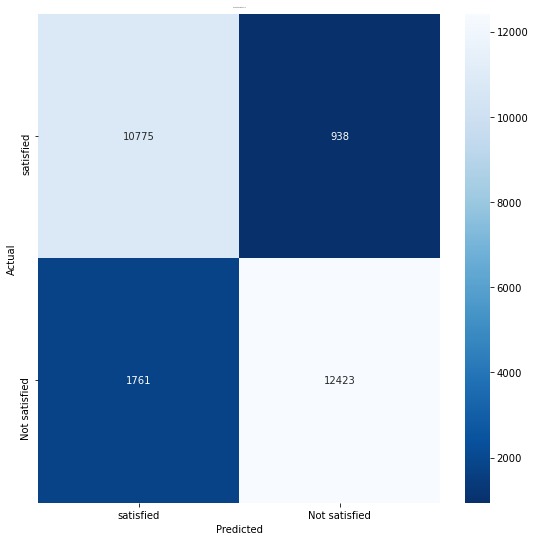

In [349]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [350]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
dt_metrics_df = pd.DataFrame(measure_performance(cm))
dt_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.92,0.88,0.92,0.86,0.9


Total Accuracy:  0.9


In [351]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


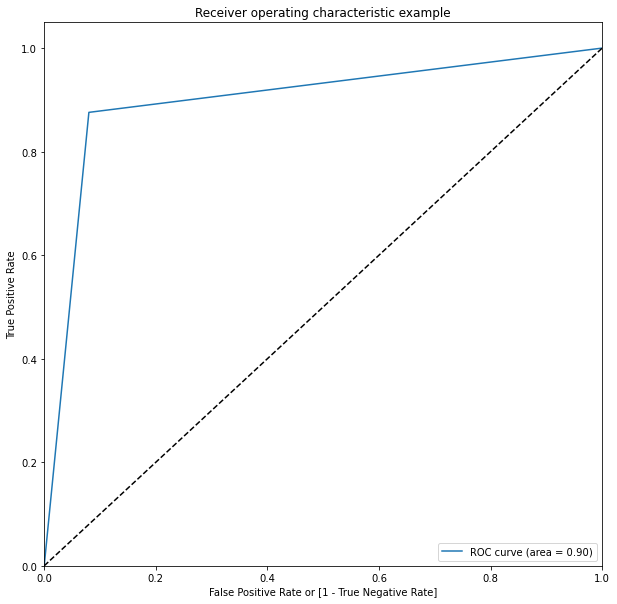

In [352]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [353]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.9

## k-fold cross validation

In [354]:
scores = cross_val_score( dt_v1,
                          X_train,
                          y_train,
                          cv = 10,
                          scoring = 'roc_auc')

In [355]:
scores

array([0.96602545, 0.96284338, 0.96679852, 0.96353275, 0.9659408 ,
       0.96524518, 0.96858296, 0.96201831, 0.96665296, 0.95825415])

In [356]:
scores.mean()

0.9645894459949153

In [357]:
scores.std()

0.0028340173813365174

In [358]:
print("Increase in ROC-AUC after k-fold cross validation = ", scores.mean()/auc_score)

Increase in ROC-AUC after k-fold cross validation =  1.0742941855391908


## Grid search - decision tree

In [317]:
max_features = [None, 'auto', 'log2']
max_depth = [5,7,10]
min_samples_split = [50,75]
min_samples_leaf = [50, 75]
class_weight = ['balanced',None]

random_grid = {'dt__criterion': criterion,
               'dt__max_features' :  max_features,
               'dt__max_depth' :  max_depth,
               'dt__min_samples_split': min_samples_split,
               'dt__min_samples_leaf' : min_samples_leaf,
               'dt__class_weight' : class_weight}
random_grid

{'dt__criterion': ['gini', 'entropy'],
 'dt__max_features': [None, 'auto', 'log2'],
 'dt__max_depth': [5, 7, 10],
 'dt__min_samples_split': [50, 75],
 'dt__min_samples_leaf': [50, 75],
 'dt__class_weight': ['balanced', None]}

In [318]:
dt_grid_v1 = GridSearchCV(dt_v1,
                           param_grid=random_grid,
                           cv = 10,
                           scoring = 'balanced_accuracy')



In [319]:
dt_grid_v1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Seat '
                                                                          'comfort',
                                                                          'Departure/Arrival '
                                                                          'time '
                                      

In [321]:
dt_grid_v1.best_params_

{'dt__class_weight': 'balanced',
 'dt__criterion': 'gini',
 'dt__max_depth': 10,
 'dt__max_features': None,
 'dt__min_samples_leaf': 50,
 'dt__min_samples_split': 50}

In [323]:
dt_grid_v1.best_score_

0.9279867560927926

In [337]:
dt_grid_results = pd.DataFrame( dt_grid_v1.cv_results_ )

## One standard error - Model search

In [338]:
highest_score_std = dt_grid_results[dt_grid_results.rank_test_score == 1].iloc[0]['std_test_score']
highest_score_mean = dt_grid_results[dt_grid_results.rank_test_score == 1].iloc[0]['mean_test_score']

In [339]:
highest_score_mean, highest_score_std

(0.9279867560927926, 0.002888860523332275)

In [340]:
std_error = highest_score_std / np.sqrt(10)
one_standard_error = highest_score_mean - std_error

In [341]:
one_standard_error

0.927073218183165

In [342]:
dt_grid_results[dt_grid_results.mean_test_score > one_standard_error]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__class_weight,param_dt__criterion,param_dt__max_depth,param_dt__max_features,param_dt__min_samples_leaf,param_dt__min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,1.537629,0.054632,0.089610,0.008459,balanced,gini,10,None,50,50,...,0.925815,0.927256,0.922849,0.932042,0.927253,0.931268,0.929941,0.927987,0.002889,1
25,1.519190,0.057423,0.092640,0.003760,balanced,gini,10,None,50,75,...,0.925815,0.927256,0.922849,0.931900,0.927253,0.931268,0.927330,0.927770,0.002738,2
60,1.402642,0.340376,0.092860,0.026296,balanced,entropy,10,None,50,50,...,0.926706,0.930176,0.924626,0.932063,0.923489,0.927660,0.926792,0.927440,0.002420,5
61,1.515222,0.102621,0.096426,0.006635,balanced,entropy,10,None,50,75,...,0.926706,0.930176,0.924626,0.932063,0.923489,0.927660,0.926792,0.927440,0.002420,5
132,1.250557,0.009770,0.090817,0.003971,None,entropy,10,None,50,50,...,0.927689,0.928136,0.923676,0.932807,0.924286,0.928219,0.926806,0.927563,0.002589,3
133,1.260656,0.049514,0.093066,0.004848,None,entropy,10,None,50,75,...,0.927689,0.927994,0.923676,0.932807,0.924286,0.928219,0.926806,0.927548,0.002586,4


## Prediction

In [329]:
y_pred = dt_grid_v1.predict(X_test)

In [330]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [331]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,dissatisfied,dissatisfied
4,satisfied,satisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,dissatisfied
9,satisfied,satisfied


## Confusion matrix

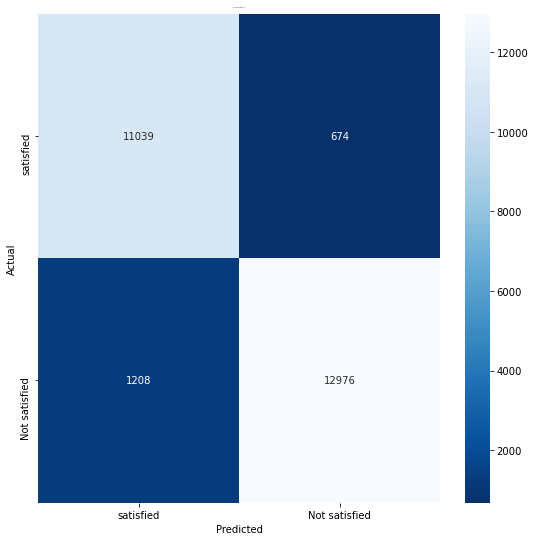

In [332]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [333]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
dt_grid_metrics_df = pd.DataFrame(measure_performance(cm))
dt_grid_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.94,0.91,0.94,0.9,0.93


Total Accuracy:  0.93


In [334]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


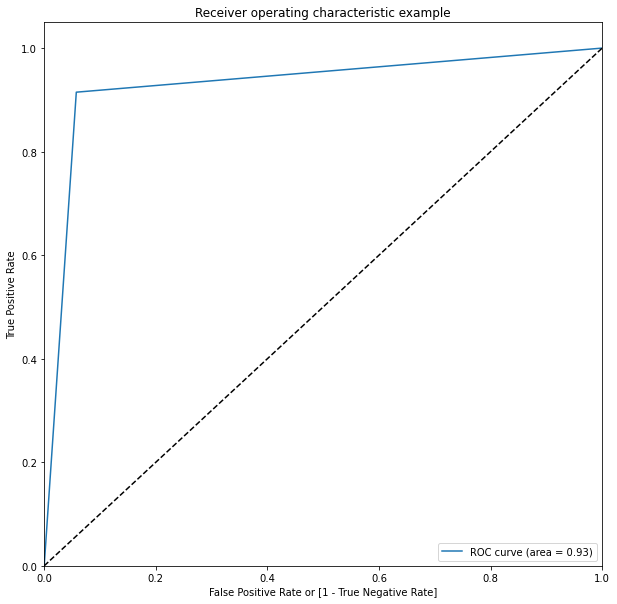

In [335]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [336]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.93

In [359]:
# random search?

# Random Forest

In [361]:
rf_model = ensemble.RandomForestClassifier(bootstrap=True, 
                                           criterion='gini',
                                           max_depth=15, 
                                           max_features='auto',
                                           min_impurity_decrease=0.001,
                                           min_samples_leaf=30, 
                                           min_samples_split=50,
                                           class_weight="balanced_subsample", #to remove class imbalance (balanced)
                                           n_estimators=200,
                                           oob_score=True, 
                                           random_state=42, 
                                           verbose=0,
                                           warm_start=False)

In [364]:
rf_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('rf', rf_model)])

In [365]:
rf_v1.fit(X_train,y_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                       

## Prediction

In [366]:
y_pred = rf_v1.predict(X_test)

In [367]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [368]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,dissatisfied,dissatisfied
4,satisfied,satisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,dissatisfied
9,satisfied,satisfied


## Confusion matrix

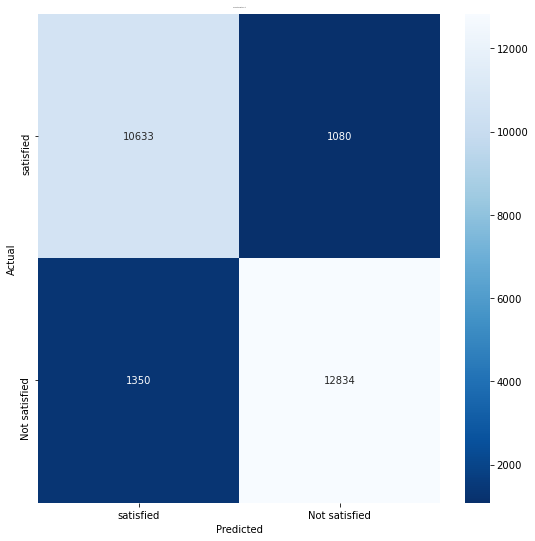

In [369]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [370]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
dt_metrics_df = pd.DataFrame(measure_performance(cm))
dt_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.91,0.9,0.91,0.89,0.91


Total Accuracy:  0.91


In [371]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


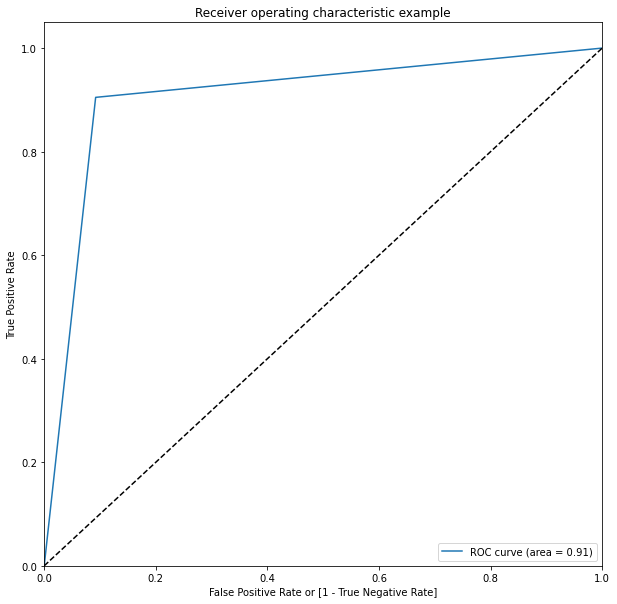

In [372]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [373]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.91

## Random search CV - Random forest

In [419]:
n_estimators = [100,200,300, 400, 500]
max_depth = [7,10,20]
max_depth.append(None)
max_features = ['auto', 'log2']
min_samples_split = [50, 75, 100]
min_samples_leaf = [30,40]
class_weight=['balanced_subsample','balanced']

random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_depth': max_depth,
               'rf__max_features': max_features,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__class_weight': class_weight}
random_grid

{'rf__n_estimators': [100, 200, 300, 400, 500],
 'rf__max_depth': [7, 10, 20, None],
 'rf__max_features': ['auto', 'log2'],
 'rf__min_samples_split': [50, 75, 100],
 'rf__min_samples_leaf': [30, 40],
 'rf__class_weight': ['balanced_subsample', 'balanced']}

In [420]:
rf_grid_v1 = RandomizedSearchCV(estimator = rf_v1, 
                               param_distributions = random_grid, scoring = "precision",
                               n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -2, pre_dispatch =2)


In [421]:
rf_grid_v1.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\RK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Flight '
                                                                                'Distance',
                                                                                'Seat '
                                                                                'comfort',
                                                                                'Departure/Arrival '
                                                       

In [422]:
rf_grid_v1.best_params_

{'rf__n_estimators': 400,
 'rf__min_samples_split': 100,
 'rf__min_samples_leaf': 30,
 'rf__max_features': 'auto',
 'rf__max_depth': 10,
 'rf__class_weight': 'balanced_subsample'}

In [428]:
rf_grid_results = pd.DataFrame( rf_grid_v1.cv_results_ )

## one standard error model search

In [429]:
highest_score_std = rf_grid_results[rf_grid_results.rank_test_score == 1].iloc[0]['std_test_score']
highest_score_mean = rf_grid_results[rf_grid_results.rank_test_score == 1].iloc[0]['mean_test_score']

In [431]:
highest_score_mean, highest_score_std

(nan, nan)

In [432]:
std_error = highest_score_std / np.sqrt(10)
one_standard_error = highest_score_mean - std_error

In [433]:
one_standard_error

nan

In [434]:
rf_grid_results[rf_grid_results.mean_test_score > one_standard_error]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_rf__min_samples_split,param_rf__min_samples_leaf,param_rf__max_features,param_rf__max_depth,param_rf__class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score


## Prediction

In [435]:
y_pred = rf_grid_v1.predict(X_test)

In [436]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [437]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,dissatisfied,dissatisfied
4,satisfied,satisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,dissatisfied
9,satisfied,satisfied


## Confusion Matrix

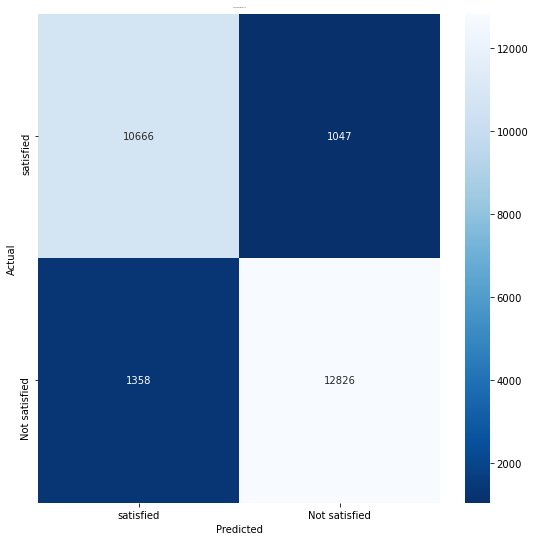

In [438]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [439]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
rf_CV_metrics_df = pd.DataFrame(measure_performance(cm))
rf_CV_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.91,0.9,0.91,0.89,0.91


Total Accuracy:  0.91


In [440]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


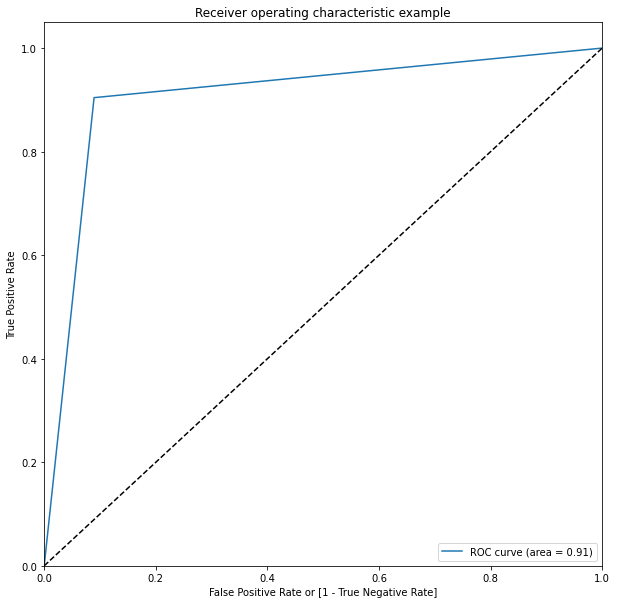

In [441]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [442]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.91

In [390]:
# random search?

# XGboost

In [394]:
predictors = [x for x in X_train.columns]
predictors

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [395]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)


In [396]:
xg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('xbg1', xgb1)])

In [397]:
xg_v1.fit(X_train, y_train)


C:\Users\RK\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                       

## Prediction

In [448]:
y_pred = xg_v1.predict(X_test)

In [449]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     })

In [450]:
y_df.head(15)

,actual,predicted
0,dissatisfied,dissatisfied
1,satisfied,satisfied
2,satisfied,dissatisfied
3,dissatisfied,dissatisfied
4,satisfied,satisfied
5,satisfied,satisfied
6,satisfied,satisfied
7,satisfied,satisfied
8,dissatisfied,dissatisfied
9,satisfied,satisfied


## Confusion matrix

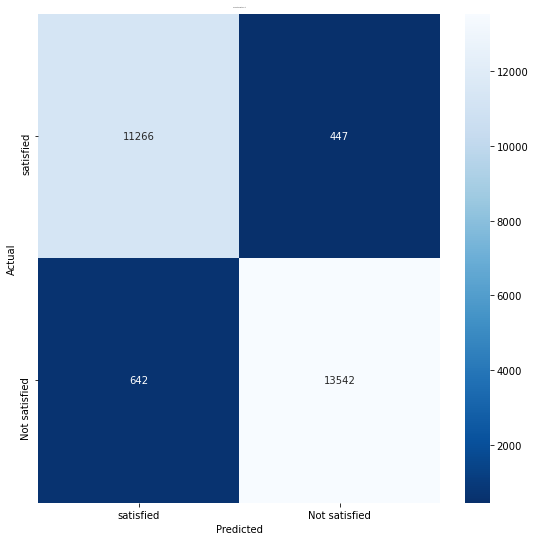

In [451]:
draw_cm( y_df.actual, y_df.predicted )

## Performance measures

In [452]:
cm = metrics.confusion_matrix(y_df.actual, y_df.predicted)
dt_metrics_df = pd.DataFrame(measure_performance(cm))
dt_metrics_df

print( 'Total Accuracy: ',np.round( metrics.accuracy_score( y_df.actual, y_df.predicted ), 2 ))

,sensitivity,specificity,recall,precision,overall_acc
0,0.96,0.95,0.96,0.95,0.96


Total Accuracy:  0.96


In [453]:
y_df['predicted_code'] = y_df.predicted.replace(('satisfied', 'dissatisfied'), (1, 0))
y_df['actual_code'] = y_df.actual.replace(('satisfied', 'dissatisfied'), (1, 0))


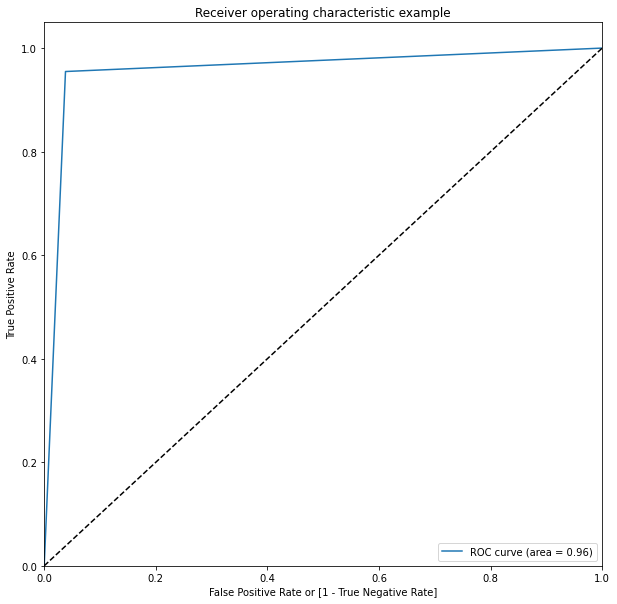

In [454]:
fpr, tpr, thresholds = draw_roc(y_df.actual_code, y_df.predicted_code)

In [455]:
auc_score = metrics.roc_auc_score( y_df.actual_code, y_df.predicted_code  )
round( float( auc_score ), 2 )

0.96

In [456]:
xg_v1_auc= auc_score

# Final model - XGBoost

## Saving the model

In [445]:
class AirlineSatisfactionPrediction():
    
    def __init__(self, model, features, auc):
        self.model = model
        self.features = features
        self.auc = auc

In [459]:
my_model = AirlineSatisfactionPrediction(xg_v1, list(X_train.columns), xg_v1_auc)

In [460]:
from joblib import dump

In [462]:
dump(my_model, './airline_xgb.pkl')

['./airline_xgb.pkl']

In [463]:
dump(my_model, './airline_xgb.parquet')

['./airline_xgb.parquet']